In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.cm as cm
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Data generation

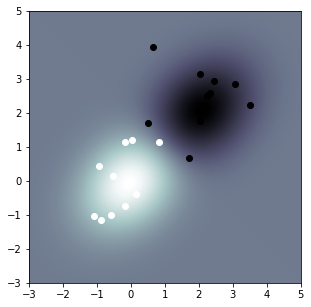

In [72]:
delta = 0.025
x = y = np.arange(-3.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv1 = stats.multivariate_normal([0, 0], [[1, 0.3], [0.3, 1]])
Z1 = rv1.pdf(pos)
rv2 = stats.multivariate_normal([2, 2], [[1, 0.3], [0.3, 1]])
Z2 = rv2.pdf(pos)
Z = (Z1 - Z2)

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.bone,
               origin='lower', extent=[-3, 5, -3, 5],
               vmax=abs(Z).max(), vmin=-abs(Z).max())
mean, cov = [0, 0], [(1, .3), (.3, 1)]

data1 = np.random.multivariate_normal(mean, cov, 10)
df1 = pd.DataFrame(data1, columns=["x", "y"])
im = plt.scatter(df1.x, df1.y, color='white')

data2 = np.random.multivariate_normal(mean, cov, 10)
df2 = pd.DataFrame(data2+2, columns=["x", "y"])
im = plt.scatter(df2.x, df2.y, color='black')
plt.show()
fig.savefig('datagen.png', format='png', dpi=100)
fig.savefig('datagen.eps', format='eps', dpi=100)

In [8]:
np.vstack(([1]*2,[0]*2))

array([[1, 1],
       [0, 0]])

In [61]:
#####################
# Matrix Generation #
#####################

# Tri-Diagonal Matrix
def genTriDiag( k, x, d=1 ):
    mat = np.diag([d]*k)
    off = np.diag([x]*(k-1))
    off = np.vstack((off,[0]*(k-1)))
    off = np.vstack(( [0]*k,off.T))
    mat = mat+off+off.T
    return(mat)

# Auto-Regressive Matrix
def genArMat( k, x ):
    indx = np.array(list(range(1,k+1))*k).reshape((k,k))
    indx = np.abs(indx-indx.T)
    mat  = x**indx
    return(mat)

# Banded Matrix
def genBandedMat( k, m ):
    mat = np.zeros((k,k))
    for i in range(1,m):
        off = np.diag([1-i/m]*(k-i))
        off = np.vstack((off,np.zeros((i,k-i))))
        off = np.vstack((np.zeros((i,k)),off.T))
        mat = mat + off
    mat = mat + mat.T + np.diag(np.ones(k))
    return(mat)

# Random Sparse Matrix
def genRandSpMat(k,p=0.1 ):
    msk = np.random.normal(loc=1, scale=p, size=k**2).reshape((k,k))
    rnd = np.random.uniform(0.3,0.8,k**2).reshape((k,k))
    mat = msk*rnd
    mat = mat+mat.T
    w, v = np.linalg.eig(mat)
    eig = min(min(w),0)
    mat = mat + np.diag([0.01-eig]*k)
    return(mat)

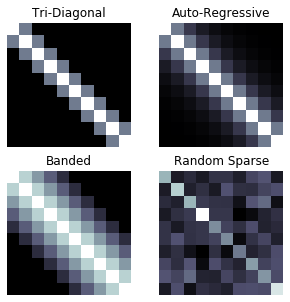

In [67]:
k=10
p=0.5
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.imshow(genTriDiag(k,p),cmap=cm.bone)
plt.axis('off')
plt.title('Tri-Diagonal')
plt.subplot(2,2,2)
plt.imshow(genArMat(k,p),cmap=cm.bone)
plt.axis('off')
plt.title('Auto-Regressive')
plt.subplot(2,2,3)
plt.imshow(genBandedMat(k,5),cmap=cm.bone)
plt.axis('off')
plt.title('Banded')
plt.subplot(2,2,4)
plt.imshow(genRandSpMat(k),cmap=cm.bone)
plt.axis('off')
plt.title('Random Sparse')
plt.savefig('sparse.png', format='png', dpi=100)
.savefig('sparse.eps', format='eps', dpi=100)

# Simulation
## Balanced

In [4]:
data=pd.read_csv('simulation/simulation_arm_balance.csv')
data=data.rename({'t': 'Distance', 'prec': 'Accuracy','type':'Type'}, axis='columns')
data.describe(include='all')

,ytrue,ypred,method,alf,Type,Distance,Accuracy
count,2520000.0,2.520000e+06,2520000,2.520000e+06,2016000,2.520000e+06,2520000
unique,NaN,NaN,7,NaN,4,NaN,2
top,NaN,NaN,LDAS,NaN,adpt,NaN,True
freq,NaN,NaN,2016000,NaN,504000,NaN,2211428
mean,0.5,4.987873e-01,NaN,-1.898667e-01,NaN,1.000000e+00,NaN
std,0.5,4.999986e-01,NaN,4.053507e-01,NaN,6.055302e-01,NaN
min,0.0,0.000000e+00,NaN,-1.000000e+00,NaN,0.000000e+00,NaN
25%,0.0,0.000000e+00,NaN,1.000000e-03,NaN,5.000000e-01,NaN
50%,0.5,0.000000e+00,NaN,5.000000e-03,NaN,1.000000e+00,NaN
75%,1.0,1.000000e+00,NaN,1.000000e-02,NaN,1.500000e+00,NaN


D:\Anoconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


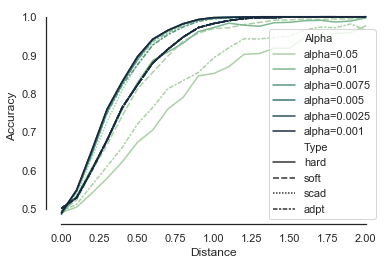

In [5]:
#datas=data[data.method=='LDAS']
data_ldas=data.query("method=='LDAS'")
data_ldas['Alpha']='alpha='+data_ldas.alf.astype('str')
#in order to make alf recognized as factor by hue in seaborn, convert alf into string that unablt to be interpreted as numric

sns.set(style="white")
sns.lineplot(x="Distance", y="Accuracy",
             hue="Alpha",style='Type',
             palette="ch:r=-.5,l=.75",
             data=data_ldas,ci=None)
sns.despine(trim=True)

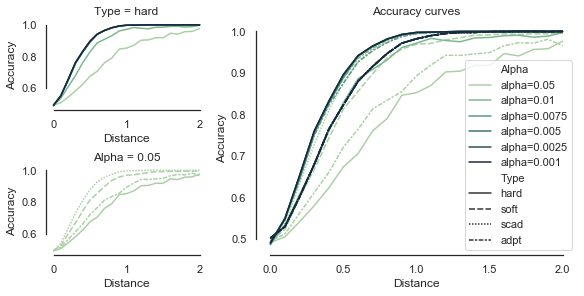

In [7]:
fig3 = plt.figure(constrained_layout=True,figsize=[8,4])
gs = fig3.add_gridspec(2, 3)
f3_ax1 = fig3.add_subplot(gs[:,1:])
sns.set(style="white")
sns_plot=sns.lineplot(x="Distance", y="Accuracy",
             hue="Alpha",style='Type',
             palette="ch:r=-.5,l=.75",
             data=data_ldas,ci=None)
sns.despine(trim=True)
sns_plot.set_title('Accuracy curves')
#sns_plot.set(xlabel='Distance', ylabel='Accuracy')

f3_ax2 = fig3.add_subplot(gs[0,0])
sns.set(style="white")
sns.lineplot(x="Distance", y="Accuracy",
             hue="Alpha",
             palette="ch:r=-.5,l=.75",
             data=data_ldas.query("Type=='hard'"),ci=None,
            legend=None).set_title('Type = hard')
sns.despine(trim=True)

f3_ax3 = fig3.add_subplot(gs[1,0])
sns.set(style="white")
sns.lineplot(x="Distance", y="Accuracy",
             hue="Alpha",style='Type',
             palette="ch:r=-.5,l=.75",
             data=data_ldas.query("alf==0.05"),ci=None,
            legend=None).set_title('Alpha = 0.05')  
sns.despine(trim=True)
plt.show()
fig.savefig('arm_sim.eps', format='eps', dpi=100)

<Figure size 576x288 with 0 Axes>

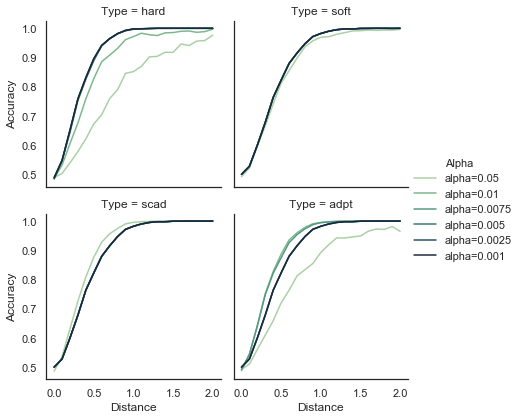

In [20]:
fig3 = plt.figure(constrained_layout=True,figsize=[8,4])
sns.set(style="white")
sns.relplot(x="Distance", y="Accuracy",
            hue="Alpha",
            col='Type',col_wrap=2,height=3,
            palette="ch:r=-.5,l=.75",kind='line',
            data=data_ldas,ci=None)

D:\Anoconda\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


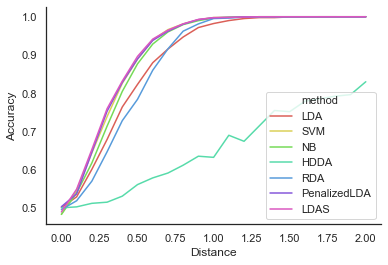

In [10]:
data_method=data[(data.method!='LDAS')]
data_LDAS=data_ldas.query("Type == 'hard'& alf == 0.001")
sns_plot=sns.lineplot(x="Distance", y="Accuracy", 
                      hue='method',
                      palette=sns.color_palette("hls", 7),
                      data=data_method.append(data_LDAS),ci=None)
sns.despine()

## unbalanced

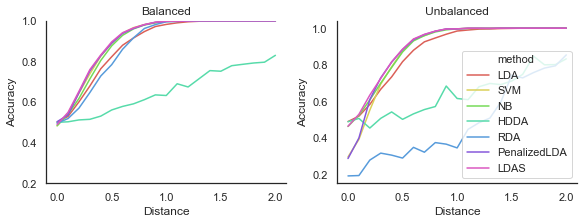

In [12]:
fig3 = plt.figure(constrained_layout=True,figsize=[8,3])
gs = fig3.add_gridspec(1, 2)
f3_ax1 = fig3.add_subplot(gs[0,0])
sns_plot=sns.lineplot(x="Distance", y="Accuracy", 
                      hue='method',
                      palette=sns.color_palette("hls", 7),
                      data=data_method.append(data_LDAS),ci=None,legend=None).set_title('Balanced')
plt.ylim(0.2, 1.0)
sns.despine()
f3_ax1 = fig3.add_subplot(gs[0,1])

data2=pd.read_csv('simulation/simulation_arm_unbalance.csv')
data2=data2.rename({'t': 'Distance', 'prec': 'Accuracy','type':'Type'}, axis='columns')
data_method2=data2[(data2.method!='LDAS')]
data_LDAS2=data2.query("method=='LDAS'").query("Type == 'hard'& alf == 0.001")

sns_plot=sns.lineplot(x="Distance", y="Accuracy", 
                      hue='method',
                      palette=sns.color_palette("hls", 7),
                      data=data_method2.append(data_LDAS2).query('ytrue==0'),ci=None).set_title('Unbalanced')
sns.despine()
fig.savefig('method.eps', format='eps', dpi=100)

# Real data
## khan data

In [14]:
real=pd.read_csv('real/khan.csv')
real_CV=pd.read_csv('real/khan_CV.csv')
real_data=pd.merge(real, real_CV, on=['index', 'index'])
real_data['Accuracy']=real_data.ytrue==real_data.ypred
real_method=real_data.query("method!='LDAS'")
real_ldas=real_data.query("method=='LDAS'")
CV_method=real_method.groupby(['method','fold'],as_index=False).mean()
CV_ldas=real_ldas.groupby(['alf','type','fold'],as_index=False).mean()

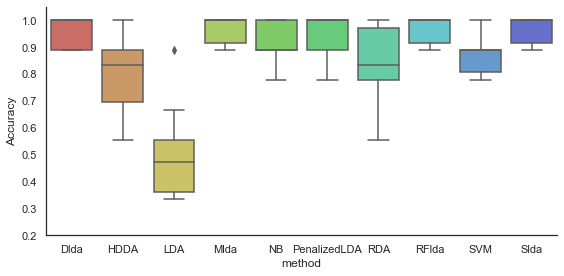

In [15]:
sns_plot=sns.catplot(x='method',y='Accuracy',data=CV_method,
           palette=sns.color_palette("hls", 14)[:-4],
           kind='box',
           height=4, aspect=2)
plt.ylim(0.2,1.05)
plt.savefig('MP_methods.png', format='png', dpi=100)

(0.2, 1.05)

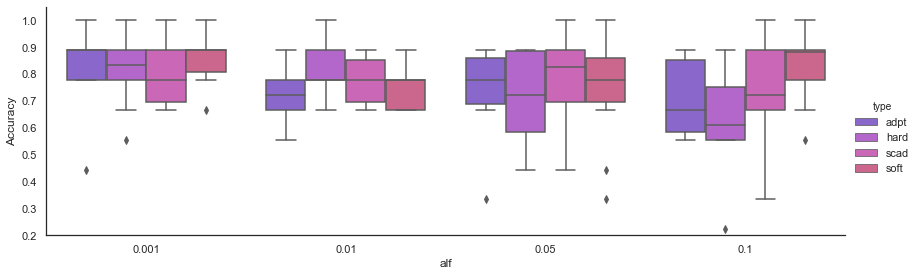

In [16]:
sns_plot = sns.catplot(x='alf',y='Accuracy',hue="type",data=CV_ldas,
           palette=sns.color_palette("hls",14)[-4:],
           kind='box',
           height=4, aspect=3)
plt.ylim(0.2,1.05)

## MP data

In [17]:
real=pd.read_csv('real/MP.csv')
real_CV=pd.read_csv('real/MP_CV.csv')
real_data=pd.merge(real, real_CV, on=['index', 'index'])
real_data['Accuracy']=real_data.ytrue==real_data.ypred
real_method=real_data.query("method!='LDAS'")
real_ldas=real_data.query("method=='LDAS'")
CV_method=real_method.groupby(['method','fold'],as_index=False).mean()
CV_ldas=real_ldas.groupby(['alf','type','fold'],as_index=False).mean()

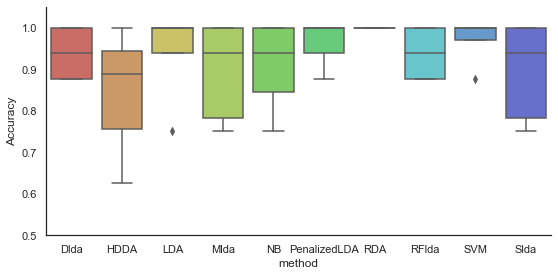

In [18]:
sns_plot=sns.catplot(x='method',y='Accuracy',data=CV_method,
           palette=sns.color_palette("hls", 14)[:-4],
           kind='box',
           height=4, aspect=2)
plt.ylim(0.5,1.05)
plt.savefig('MP_methods.png', format='png', dpi=100)

(0.5, 1.05)

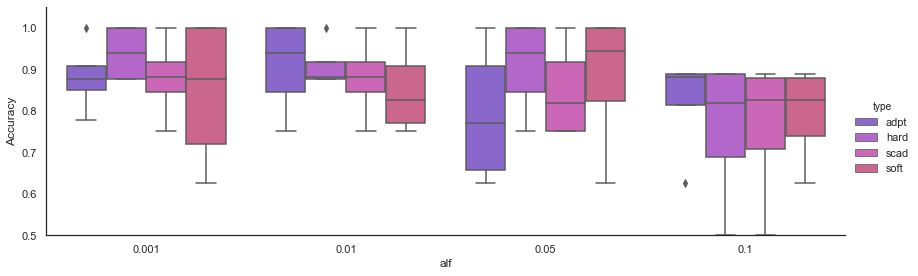

In [19]:
sns_plot = sns.catplot(x='alf',y='Accuracy',hue="type",data=CV_ldas,
           palette=sns.color_palette("hls",14)[-4:],
           kind='box',
           height=4, aspect=3)
plt.ylim(0.5,1.05)